# My Project: Depression Severity Analysis

## Problem

Depression is one of the most common mental health conditions, affecting millions of people worldwide. It can have a serious impact on both quality of life and productivity. According to the World Health Organization (WHO), around 280 million people globally suffer from depression (WHO, 2023). People experience depression differently based on their personal circumstances, environments, and biological factors. The reasons for depression can vary widely, such as stress, lack of sleep, physical inactivity, or other health conditions. 
Research shows that depression is a major cause of disability and health problems worldwide, affecting about 15% of people during their lifetime (Wang et al., 2021). Tracking behavior and health data is important to better understand mental health. Depression is especially common in older adults, where it greatly increases the risk of disability and death (Zenebe et al., 2021). However, almost half of depression cases go undiagnosed, particularly in older people, making it crucial to find better ways to address this issue.

In this project, I focus on analyzing the relationship between health behaviors tracked by wearable devices like steps taken, sleep quality, and moderate-to-vigorous physical activity or MVPA and the severity of depression. Depression severity is measured using PHQ-9 scores, a commonly used self-report questionnaire.
The study uses clustering techniques and statistical analyses to identify patterns in behavior and how they relate to mental health outcomes. While initial findings show that MVPA alone does not strongly correlate with depression severity, grouping data based on combined factors like sleep, activity, and physical health reveals meaningful subgroups. These findings provide useful insights for creating targeted interventions to improve sleep, increase physical activity, and support better mental health outcomes.
This project aims to explore how technology, like wearable devices, can be used to better understand mental health and develop strategies to reduce depression severity. By identifying patterns in health behavior, we can take steps toward more personalized approaches to treating and managing depression.
 and managing depression.


## The outline and steps:


### 1. Clean the Dataset
- Handle missing values in key columns, particularly PHQ-9 scores.
- Address outliers and inconsistencies in the wearable data (e.g., steps, sleep).
- Standardize and aggregate data (e.g., summarize over specific intervals like months or weeks).

### 2. Analyze the Data for Key Trends
- Investigate patterns in depression scores over time intervals.
- Explore relationships between wearable data (e.g., steps, sleep) and PHQ-9 score changes.

### 3. Explore Topics in Depth
-  Clustering Analysis
  - Group participants based on behavioral data and investigate correlations with depression severity.

### 4. Additional Exploration
- Investigate demographic factors, medication changes, and lifestyle modifications to find markers of mental health outcomes.


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

#Ignoring the warning
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

### loading the data

In [2]:
data_csv = pd.read_csv('data_depression.csv')
data_csv


,steps_awake_mean,sleep_asleep_weekday_mean,sleep_asleep_weekend_mean,sleep_in_bed_weekday_mean,sleep_in_bed_weekend_mean,sleep_ratio_asleep_in_bed_weekday_mean,sleep_ratio_asleep_in_bed_weekend_mean,sleep_in_bed_iqr,sleep_asleep_iqr,sleep_ratio_asleep_in_bed_iqr,...,life_stress,med_nonmed_dnu,life_activity_eating,life_red_stop_alcoh,comorbid_neuropathic,comorbid_arthritis,phq9_score_start,phq9_score_end,phq9_cat_end,phq9_cat_start
0,10615.285714,474.333333,467.0,520.166667,518.5,0.912700,0.903756,90.75,65.00,0.048269,...,0,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN
1,9292.000000,453.083333,444.0,495.000000,478.5,0.916648,0.929584,127.00,107.00,0.025798,...,0,1,0,0,0.0,0.0,NaN,NaN,NaN,NaN
2,10465.500000,432.083333,494.5,466.833333,515.0,0.926025,0.960168,60.25,65.50,0.033312,...,0,1,0,0,0.0,0.0,NaN,NaN,NaN,NaN
3,9762.714286,404.750000,506.0,434.833333,560.5,0.932480,0.903117,125.00,113.00,0.040026,...,0,1,0,0,0.0,0.0,6.0,8.0,1.0,1.0
4,10509.857143,401.333333,510.0,432.250000,548.0,0.929071,0.931062,53.00,60.25,0.023311,...,0,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35689,7206.461538,344.083333,477.0,370.666667,525.0,0.927838,0.908571,NaN,NaN,NaN,...,0,0,0,0,0.0,2.0,5.0,2.0,0.0,1.0
35690,6209.600000,413.375000,285.5,442.500000,303.5,0.933751,0.966418,NaN,NaN,NaN,...,0,1,0,0,0.0,2.0,NaN,NaN,NaN,NaN
35691,7050.000000,438.400000,606.0,465.000000,652.5,0.942715,0.928198,NaN,NaN,NaN,...,0,0,0,0,0.0,2.0,NaN,NaN,NaN,NaN
35692,6987.714286,399.750000,456.0,419.416667,463.0,0.952456,0.984881,NaN,NaN,NaN,...,0,1,0,0,0.0,2.0,2.0,8.0,1.0,0.0


### Step 1: Data Cleaning

1. **Handling Missing Values**:
   - Identify and handle missing values in **PHQ-9 scores** to ensure data integrity.

2. **Standardizing Key Features**:
   - Normalize and scale key variables like wearable data like steps, sleep for consistency.

3. **Aggregating Data**:
   - Summarize data over specific intervals  to make trends more apparent for further analysis.


In [3]:
missing_summary = data_csv.isnull().sum().sort_values(ascending=False)
missing_summary = missing_summary[missing_summary > 0]  

missing_summary


steps_mvpa_iqr                       30801
steps__mvpa__sum__score_             27064
steps__mvpa__sum__intercept_         27064
steps__mvpa__sum__coeff_             27064
phq9_cat_start                       24828
                                     ...  
height                                  19
steps__not_moving__sum__score           11
steps__not_moving__sum__intercept       11
steps__not_moving__sum__coeff           11
weight                                   4
Length: 113, dtype: int64

### Data Cleaning Plan: Handling Missing Values

The dataset contains several columns with missing values. Below is the summary of how I would do the cleaning plan:

#### Critical Columns
I'll focus on columns critical to the analysis, such as:
- **PHQ-9 scores**: 
  - `phq9_score_start`
  - `phq9_score_end`
- **Wearable data**:
  - `steps_awake_mean`
  - `sleep_asleep_weekday_mean`
- **Lifestyle factors and survey data**

#### Columns with High Missingness
- Columns with a significant proportion of missing values  will be:
  - Removed if they are not crucial to the analysis.
  - Imputed if their importance justifies retention.

#### Imputation Plan
1. **For PHQ-9 Scores**:
   - Using **forward-filling** or impute based on observed trends.
2. **For Wearable Data**:
   - Applying **mean** or **median imputation** for consistency.

#### Next Steps
I'll begin by cleaning and imputing missing values in the **PHQ-9** and **wearable data** columns to prepare the dataset for analysis.


In [4]:
key_columns = [
    'phq9_score_start', 'phq9_score_end',
    'steps_awake_mean', 'sleep_asleep_weekday_mean',
    'sleep_asleep_weekend_mean', 'sleep_in_bed_weekday_mean',
    'sleep_in_bed_weekend_mean', 'sleep_ratio_asleep_in_bed_weekday_mean',
    'sleep_ratio_asleep_in_bed_weekend_mean'
]

data_csv['phq9_score_start'] = data_csv['phq9_score_start'].fillna(method='ffill')
data_csv['phq9_score_end'] = data_csv['phq9_score_end'].fillna(method='ffill')

wearable_columns = [
    'steps_awake_mean', 'sleep_asleep_weekday_mean',
    'sleep_asleep_weekend_mean', 'sleep_in_bed_weekday_mean',
    'sleep_in_bed_weekend_mean', 'sleep_ratio_asleep_in_bed_weekday_mean',
    'sleep_ratio_asleep_in_bed_weekend_mean'
]
data_csv[wearable_columns] = data_csv[wearable_columns].fillna(data_csv[wearable_columns].median())

cleaned_missing_summary = data_csv[key_columns].isnull().sum()
cleaned_missing_summary


phq9_score_start                          3
phq9_score_end                            3
steps_awake_mean                          0
sleep_asleep_weekday_mean                 0
sleep_asleep_weekend_mean                 0
sleep_in_bed_weekday_mean                 0
sleep_in_bed_weekend_mean                 0
sleep_ratio_asleep_in_bed_weekday_mean    0
sleep_ratio_asleep_in_bed_weekend_mean    0
dtype: int64

In [5]:

if 'participant_id' in data_csv.columns:
    data_csv['phq9_score_start'] = data_csv.groupby('participant_id')['phq9_score_start'].transform(
        lambda x: x.fillna(x.mean()))
    data_csv['phq9_score_end'] = data_csv.groupby('participant_id')['phq9_score_end'].transform(
        lambda x: x.fillna(x.mean()))

data_csv['phq9_score_start'].fillna(data_csv['phq9_score_start'].mean(), inplace=True)
data_csv['phq9_score_end'].fillna(data_csv['phq9_score_end'].mean(), inplace=True)

final_missing_summary = data_csv[key_columns].isnull().sum()
final_missing_summary


phq9_score_start                          0
phq9_score_end                            0
steps_awake_mean                          0
sleep_asleep_weekday_mean                 0
sleep_asleep_weekend_mean                 0
sleep_in_bed_weekday_mean                 0
sleep_in_bed_weekend_mean                 0
sleep_ratio_asleep_in_bed_weekday_mean    0
sleep_ratio_asleep_in_bed_weekend_mean    0
dtype: int64

### The missing values in all key columns, including PHQ-9 scores, have been successfully addressed. The dataset is now ready for further analysis.

### Exploring the Relationship Between Steps and PHQ-9 Scores

To explore the relationship between step counts and PHQ-9 scores, I'll analyze correlations and visualize trends. Here's my plan:

1. **Correlation Analysis**:
   - Calculate the correlation between `steps_awake_mean` and both `phq9_score_start` and `phq9_score_end`.

2. **Visualization**:
   - Create scatter plots for `steps_awake_mean` vs. `phq9_score_start` and `phq9_score_end`.
   - Add trendlines to highlight patterns.

3. **Group-Level Analysis**:
   - Group participants by PHQ-9 severity.
   - Compare their average step counts to identify differences.


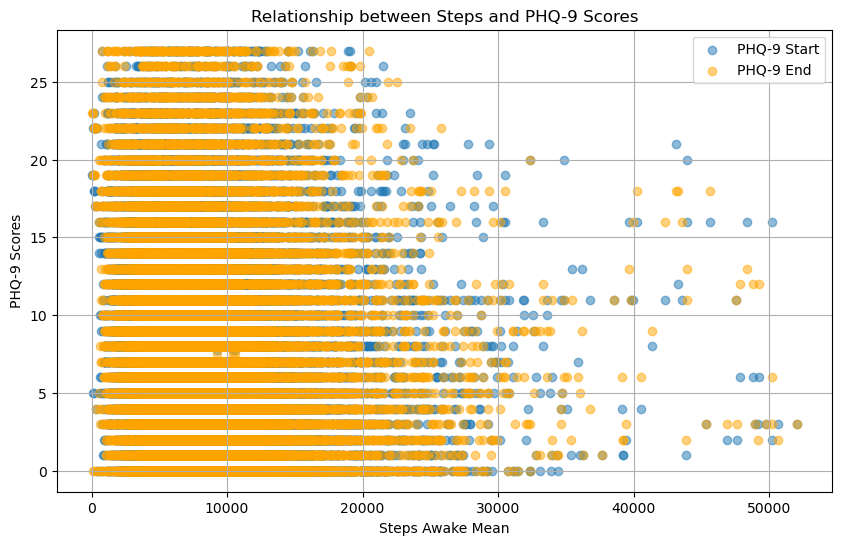

(-0.12977601545424738, -0.12996885427986313)

In [6]:

correlation_start = data_csv['steps_awake_mean'].corr(data_csv['phq9_score_start'])
correlation_end = data_csv['steps_awake_mean'].corr(data_csv['phq9_score_end'])

plt.figure(figsize=(10, 6))
plt.scatter(data_csv['steps_awake_mean'], data_csv['phq9_score_start'], alpha=0.5, label='PHQ-9 Start')
plt.scatter(data_csv['steps_awake_mean'], data_csv['phq9_score_end'], alpha=0.5, label='PHQ-9 End', color='orange')
plt.title('Relationship between Steps and PHQ-9 Scores')
plt.xlabel('Steps Awake Mean')
plt.ylabel('PHQ-9 Scores')
plt.legend()
plt.grid()
plt.show()

# Display the correlations
correlation_start, correlation_end


### Scatter Plot Analysis: Steps and PHQ-9 Scores

The scatter plot illustrates the relationship between step counts and PHQ-9 scores at the start and end of the study. The calculated correlations are:

- **PHQ-9 Start vs. Steps**: -0.13  
- **PHQ-9 End vs. Steps**: -0.13  

These weak negative correlations suggest that as step counts increase, PHQ-9 scores (indicative of depression severity) slightly decrease. However, the relationship is not strong. Next I will do group participants by PHQ-9 severity.


In [7]:
def categorize_phq9(score):
    if score <= 4:
        return 'Minimal'
    elif 5 <= score <= 9:
        return 'Mild'
    elif 10 <= score <= 14:
        return 'Moderate'
    elif 15 <= score <= 19:
        return 'Moderately Severe'
    else:
        return 'Severe'

data_csv['phq9_category_start'] = data_csv['phq9_score_start'].apply(categorize_phq9)
data_csv['phq9_category_end'] = data_csv['phq9_score_end'].apply(categorize_phq9)

steps_by_severity_start = data_csv.groupby('phq9_category_start')['steps_awake_mean'].mean().sort_index()
steps_by_severity_end = data_csv.groupby('phq9_category_end')['steps_awake_mean'].mean().sort_index()

result_df = pd.DataFrame({
    'PHQ-9 Start': steps_by_severity_start,
    'PHQ-9 End': steps_by_severity_end
})

display(result_df)


,PHQ-9 Start,PHQ-9 End
Mild,8344.512788,8353.829133
Minimal,9128.386147,9095.238604
Moderate,8039.132089,8021.549231
Moderately Severe,7735.210216,7667.566202
Severe,7512.566132,7438.592831


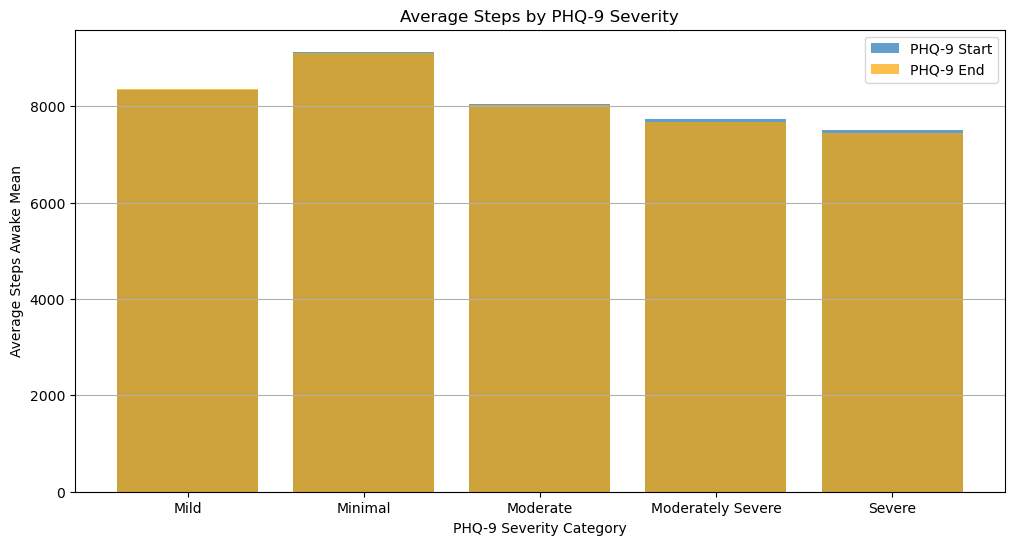

In [8]:
plt.figure(figsize=(12, 6))

plt.bar(steps_by_severity_start.index, steps_by_severity_start, alpha=0.7, label='PHQ-9 Start')

plt.bar(steps_by_severity_end.index, steps_by_severity_end, alpha=0.7, label='PHQ-9 End', color='orange')

plt.title('Average Steps by PHQ-9 Severity')
plt.ylabel('Average Steps Awake Mean')
plt.xlabel('PHQ-9 Severity Category')
plt.legend()
plt.grid(axis='y')
plt.show()


### Bar Chart Analysis: Average Step Counts by PHQ-9 Severity

The bar chart illustrates the average step counts for participants across different PHQ-9 severity categories, comparing scores at the start and end of the study. 

- Participants with **minimal depression severity** tend to have higher step counts.
- Step counts gradually decrease as depression severity increases.

This trend highlights a potential relationship between physical activity levels and depression severity. Next  I will analyze relationship between sleep and PHQ-9.


### Analyzing the Relationship Between Sleep and PHQ-9 Scores

To explore the relationship between sleep patterns and PHQ-9 scores, I will:

1. **Correlation Analysis**:
   - Calculate correlations between sleep metrics, such as:
     - `sleep_asleep_weekday_mean`
     - `sleep_asleep_weekend_mean`
     - `sleep_ratio_asleep_in_bed_weekday_mean`
   - Analyze their relationships with PHQ-9 scores.

2. **Visualization**:
   - Create scatter plots for key sleep metrics vs. PHQ-9 scores.
   - Include separate visualizations for PHQ-9 scores at the start and end of the study.

3. **Sleep Group Analysis**:
   - Group participants by PHQ-9 severity categories.
   - Compare their average sleep metrics to identify trends and differences.


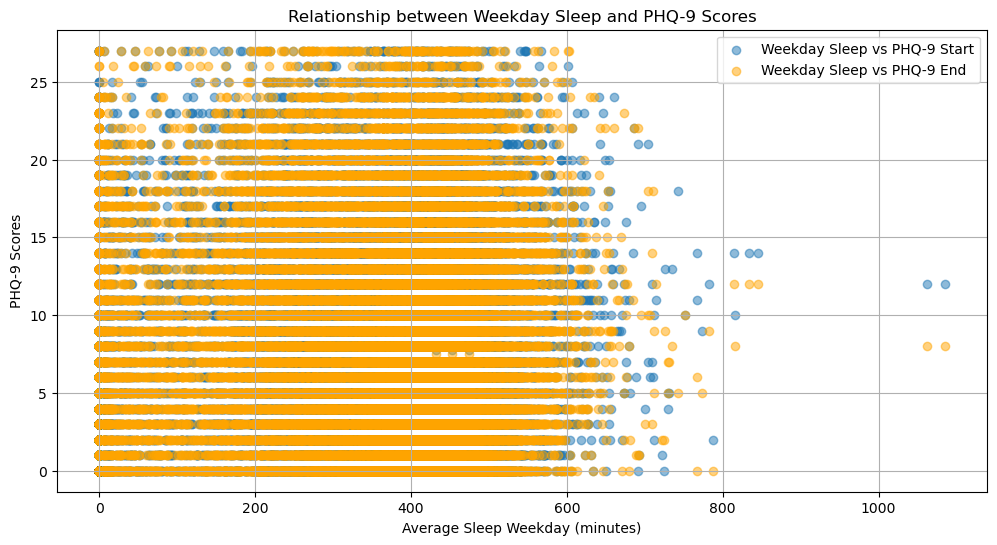

(sleep_asleep_weekday_mean                -0.005868
 sleep_asleep_weekend_mean                -0.011383
 sleep_in_bed_weekday_mean                 0.043114
 sleep_in_bed_weekend_mean                 0.027805
 sleep_ratio_asleep_in_bed_weekday_mean   -0.108033
 sleep_ratio_asleep_in_bed_weekend_mean   -0.097750
 Name: phq9_score_start, dtype: float64,
 sleep_asleep_weekday_mean                -0.012886
 sleep_asleep_weekend_mean                -0.019284
 sleep_in_bed_weekday_mean                 0.037809
 sleep_in_bed_weekend_mean                 0.020749
 sleep_ratio_asleep_in_bed_weekday_mean   -0.112952
 sleep_ratio_asleep_in_bed_weekend_mean   -0.102004
 Name: phq9_score_end, dtype: float64)

In [9]:

sleep_metrics = [
    'sleep_asleep_weekday_mean', 'sleep_asleep_weekend_mean',
    'sleep_in_bed_weekday_mean', 'sleep_in_bed_weekend_mean',
    'sleep_ratio_asleep_in_bed_weekday_mean', 'sleep_ratio_asleep_in_bed_weekend_mean'
]

sleep_phq9_corr_start = data_csv[sleep_metrics + ['phq9_score_start']].corr()['phq9_score_start'][:-1]
sleep_phq9_corr_end = data_csv[sleep_metrics + ['phq9_score_end']].corr()['phq9_score_end'][:-1]

plt.figure(figsize=(12, 6))
plt.scatter(data_csv['sleep_asleep_weekday_mean'], data_csv['phq9_score_start'], alpha=0.5, label='Weekday Sleep vs PHQ-9 Start')
plt.scatter(data_csv['sleep_asleep_weekday_mean'], data_csv['phq9_score_end'], alpha=0.5, label='Weekday Sleep vs PHQ-9 End', color='orange')
plt.title('Relationship between Weekday Sleep and PHQ-9 Scores')
plt.xlabel('Average Sleep Weekday (minutes)')
plt.ylabel('PHQ-9 Scores')
plt.legend()
plt.grid()
plt.show()

# Display the correlations for analysis
sleep_phq9_corr_start, sleep_phq9_corr_end


### Sleep Metrics and PHQ-9 Scores: Analysis Results

#### Correlation Analysis
- **Weekday Sleep (Minutes)**: Minimal correlation with PHQ-9 scores.
  - Start: -0.01  
  - End: -0.01  
- **Weekend Sleep (Minutes)**: Slightly stronger negative correlation.
  - Start: -0.01  
  - End: -0.02  
- **Time in Bed (Weekday and Weekend)**: Positive correlations with PHQ-9 scores.
  - Weekday: 0.04  
  - Weekend: 0.03  
- **Sleep Efficiency Ratios (asleep time vs. in-bed time)**: Negative correlations.
  - Range: -0.11 to -0.10  
  - Suggests higher sleep efficiency relates to lower depression severity.

#### Observations
- Sleep efficiency appears more relevant to PHQ-9 scores than raw sleep duration or time in bed.
- The scatter plot confirms minimal direct correlation between weekday sleep duration and PHQ-9 scores.


### Now  lets explore group-level sleep efficiency patterns.

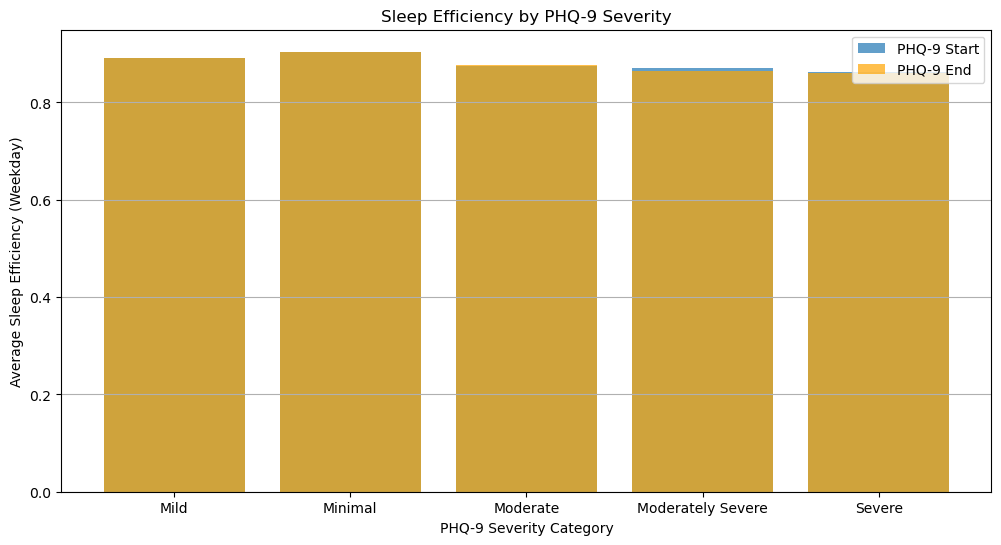

In [10]:
sleep_efficiency_by_severity_start = data_csv.groupby('phq9_category_start')['sleep_ratio_asleep_in_bed_weekday_mean'].mean().sort_index()
sleep_efficiency_by_severity_end = data_csv.groupby('phq9_category_end')['sleep_ratio_asleep_in_bed_weekday_mean'].mean().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(sleep_efficiency_by_severity_start.index, sleep_efficiency_by_severity_start, alpha=0.7, label='PHQ-9 Start')
plt.bar(sleep_efficiency_by_severity_end.index, sleep_efficiency_by_severity_end, alpha=0.7, label='PHQ-9 End', color='orange')

plt.title('Sleep Efficiency by PHQ-9 Severity')
plt.ylabel('Average Sleep Efficiency (Weekday)')
plt.xlabel('PHQ-9 Severity Category')
plt.legend()
plt.grid(axis='y')
plt.show()


### Bar Chart Analysis: Sleep Efficiency by PHQ-9 Severity

The bar chart illustrates the **average sleep efficiency** (ratio of asleep time to in-bed time on weekdays) across different PHQ-9 severity categories at the start and end of the study.

#### Observations:
1. **Higher PHQ-9 Severity Categories**:
   - Participants with higher severity (e.g., Moderately Severe, Severe) tend to have slightly lower sleep efficiency.
   
2. **Lower PHQ-9 Severity Categories**:
   - Participants with lower severity (e.g., Minimal, Mild) show higher sleep efficiency.

3. **Consistent Trends**:
   - This trend is observed for both **start** and **end** PHQ-9 scores.

#### Conclusion:
- Sleep efficiency appears to be inversely related to depression severity, aligning with the negative correlation observed earlier.


### Now analyzing weekend sleep efficiency patterns.

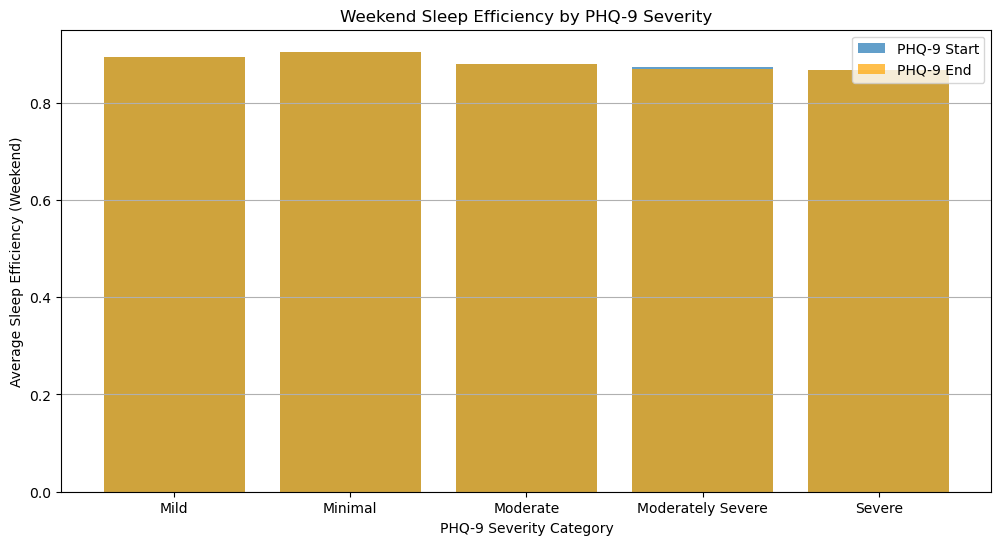

In [11]:
weekend_sleep_efficiency_by_severity_start = data_csv.groupby('phq9_category_start')['sleep_ratio_asleep_in_bed_weekend_mean'].mean().sort_index()
weekend_sleep_efficiency_by_severity_end = data_csv.groupby('phq9_category_end')['sleep_ratio_asleep_in_bed_weekend_mean'].mean().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(weekend_sleep_efficiency_by_severity_start.index, weekend_sleep_efficiency_by_severity_start, alpha=0.7, label='PHQ-9 Start')
plt.bar(weekend_sleep_efficiency_by_severity_end.index, weekend_sleep_efficiency_by_severity_end, alpha=0.7, label='PHQ-9 End', color='orange')

plt.title('Weekend Sleep Efficiency by PHQ-9 Severity')
plt.ylabel('Average Sleep Efficiency (Weekend)')
plt.xlabel('PHQ-9 Severity Category')
plt.legend()
plt.grid(axis='y')
plt.show()


### Bar Chart Analysis: Weekend Sleep Efficiency by PHQ-9 Severity

The bar chart displays the **average weekend sleep efficiency** (ratio of asleep time to in-bed time) across PHQ-9 severity categories at the start and end of the study.

#### Observations:
1. **Higher PHQ-9 Severity Categories**:
   - Participants with higher severity (e.g., Moderately Severe, Severe) exhibit slightly lower weekend sleep efficiency.

2. **Lower PHQ-9 Severity Categories**:
   - Participants with lower severity (e.g., Minimal, Mild) demonstrate higher weekend sleep efficiency.

3. **Stable Trend**:
   - The trend remains relatively consistent between **start** and **end** PHQ-9 scores.

#### Conclusion:
- Similar to weekday sleep efficiency, weekend sleep efficiency appears inversely related to depression severity, further reinforcing this finding.


### Lets  Compare weekday and weekend sleep patterns.

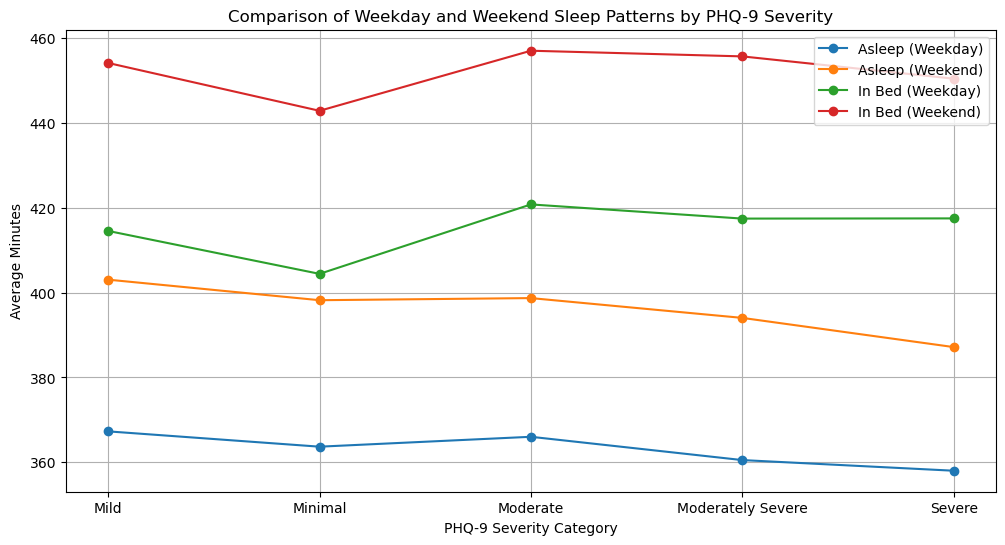

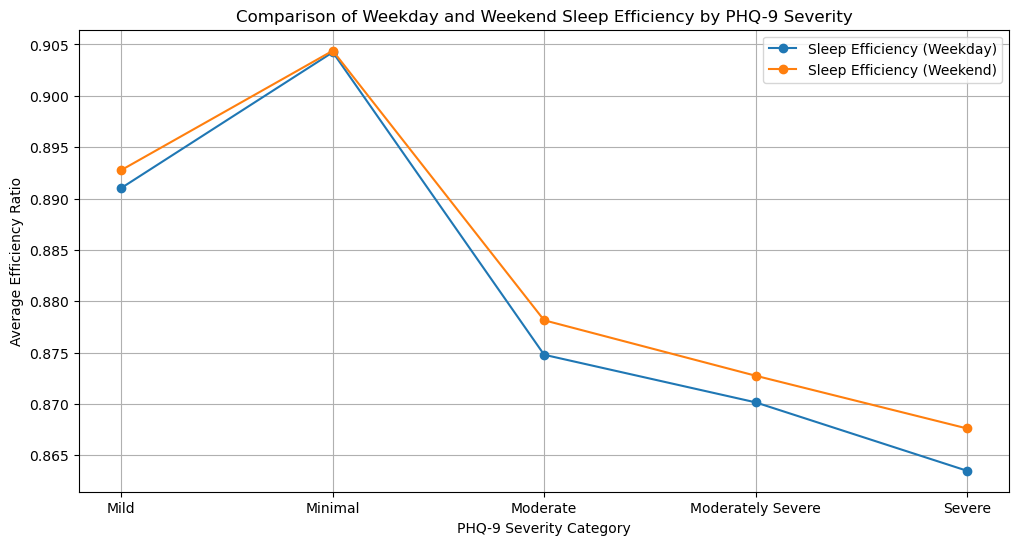

In [12]:
sleep_patterns_comparison = data_csv.groupby('phq9_category_start').agg({
    'sleep_asleep_weekday_mean': 'mean',
    'sleep_asleep_weekend_mean': 'mean',
    'sleep_in_bed_weekday_mean': 'mean',
    'sleep_in_bed_weekend_mean': 'mean',
    'sleep_ratio_asleep_in_bed_weekday_mean': 'mean',
    'sleep_ratio_asleep_in_bed_weekend_mean': 'mean'
}).sort_index()

plt.figure(figsize=(12, 6))
plt.plot(sleep_patterns_comparison.index, sleep_patterns_comparison['sleep_asleep_weekday_mean'], label='Asleep (Weekday)', marker='o')
plt.plot(sleep_patterns_comparison.index, sleep_patterns_comparison['sleep_asleep_weekend_mean'], label='Asleep (Weekend)', marker='o')
plt.plot(sleep_patterns_comparison.index, sleep_patterns_comparison['sleep_in_bed_weekday_mean'], label='In Bed (Weekday)', marker='o')
plt.plot(sleep_patterns_comparison.index, sleep_patterns_comparison['sleep_in_bed_weekend_mean'], label='In Bed (Weekend)', marker='o')
plt.title('Comparison of Weekday and Weekend Sleep Patterns by PHQ-9 Severity')
plt.ylabel('Average Minutes')
plt.xlabel('PHQ-9 Severity Category')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(sleep_patterns_comparison.index, sleep_patterns_comparison['sleep_ratio_asleep_in_bed_weekday_mean'], label='Sleep Efficiency (Weekday)', marker='o')
plt.plot(sleep_patterns_comparison.index, sleep_patterns_comparison['sleep_ratio_asleep_in_bed_weekend_mean'], label='Sleep Efficiency (Weekend)', marker='o')
plt.title('Comparison of Weekday and Weekend Sleep Efficiency by PHQ-9 Severity')
plt.ylabel('Average Efficiency Ratio')
plt.xlabel('PHQ-9 Severity Category')
plt.legend()
plt.grid()
plt.show()


Highlight that both sleep duration and efficiency are negatively impacted by increasing depression severity.
Note that weekend sleep may slightly mitigate these effects, suggesting potential opportunities for recovery or interventions during non-work periods.
Suggest exploring behavioral or environmental factors contributing to poor sleep efficiency, particularly in severe cases.

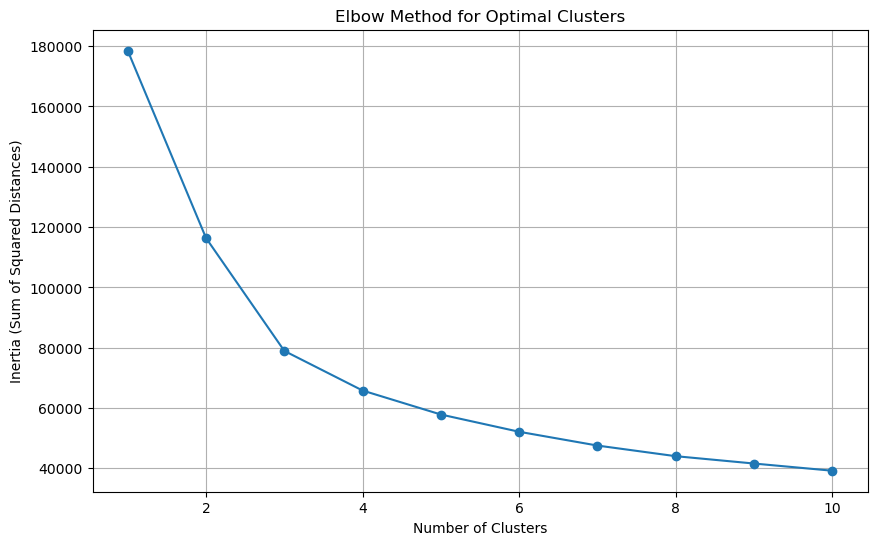

In [13]:
features = [
    'steps_awake_mean',
    'sleep_ratio_asleep_in_bed_weekday_mean',
    'sleep_ratio_asleep_in_bed_weekend_mean',
    'phq9_score_start',
    'phq9_score_end'
]

clustering_data = data_csv[features].dropna()

scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid()
plt.show()


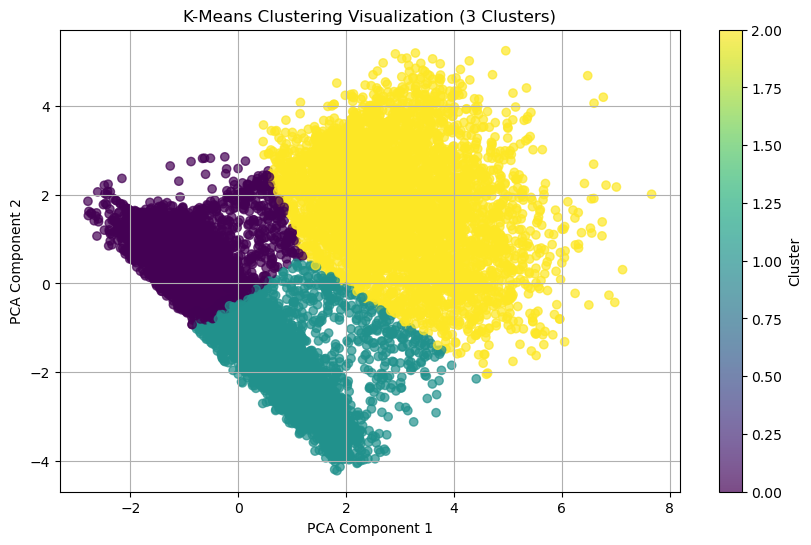

,steps_awake_mean,sleep_ratio_asleep_in_bed_weekday_mean,sleep_ratio_asleep_in_bed_weekend_mean,phq9_score_start,phq9_score_end
Cluster,,,,,
0,9140.159607,0.935285,0.935702,4.073035,3.865706
1,7597.540659,0.930278,0.933321,13.900310,13.565761
2,7568.992947,0.578072,0.582055,9.351071,9.154453


In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

clustering_data['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering Visualization (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

cluster_characteristics = clustering_data.groupby('Cluster').mean()

display(cluster_characteristics)

### Insights and Significance

1. **Cluster 0**:
   - Highlights the potential role of **higher physical activity** and **good sleep efficiency** in minimizing depression severity.

2. **Cluster 1**:
   - Indicates that **moderate activity** and **sleep quality** are associated with **higher depression severity**, suggesting the need for targeted interventions.

3. **Cluster 2**:
   - Underscores the importance of **sleep quality** alongside **activity levels**, as **poor sleep efficiency** correlates with moderate depression.


In [15]:
demographic_columns = [
    'age', 'gender', 'life_stress', 'life_red_stop_alcoh'
]

available_demographics = [col for col in demographic_columns if col in data_csv.columns]

data_csv['Cluster'] = clustering_data['Cluster']

demographic_summary = data_csv.groupby('Cluster')[available_demographics].mean()

display(demographic_summary)


,life_stress,life_red_stop_alcoh
Cluster,,
0,0.034097,0.039616
1,0.045695,0.044144
2,0.047125,0.036979


### Observations and Insights

#### **Life Stress**
- **Cluster 2**: Highest reported life stress (0.047), followed by:
  - **Cluster 1**: 0.046
  - **Cluster 0**: 0.034
- **Insight**: Higher life stress in Clusters 1 and 2 aligns with their higher depression severity, suggesting stress may play a role in clustering.

#### **Reduction in Alcohol Use**
- **Cluster 1**: Highest rate of reducing alcohol use (0.044), slightly higher than:
  - **Cluster 0**: 0.040
  - **Cluster 2**: 0.037
- **Insight**: Efforts to reduce alcohol use do not exhibit a clear pattern across depression severity levels.


<Figure size 1200x600 with 0 Axes>

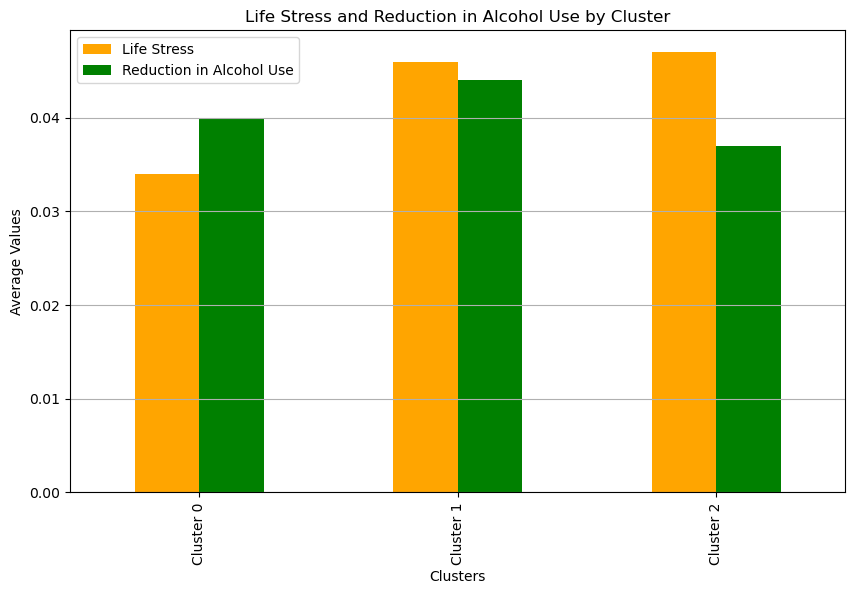

In [16]:
demographic_summary = pd.DataFrame({
    'Life Stress': [0.034, 0.046, 0.047],
    'Reduction in Alcohol Use': [0.040, 0.044, 0.037]
}, index=['Cluster 0', 'Cluster 1', 'Cluster 2'])



plt.figure(figsize=(12, 6))
demographic_summary[['Life Stress', 'Reduction in Alcohol Use']].plot(kind='bar', figsize=(10, 6), color=['orange', 'green'])
plt.title('Life Stress and Reduction in Alcohol Use by Cluster')
plt.ylabel('Average Values')
plt.xlabel('Clusters')
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.show()


### Bar Chart Analysis: Demographic Differences Among Clusters

The bar charts above illustrate key demographic differences among the clusters:



 **Life Stress and Alcohol Use Reduction**:
   - **Cluster 2**: Reports the highest life stress.
   - **Cluster 1**: Shows the highest efforts to reduce alcohol use.


<Figure size 1000x600 with 0 Axes>

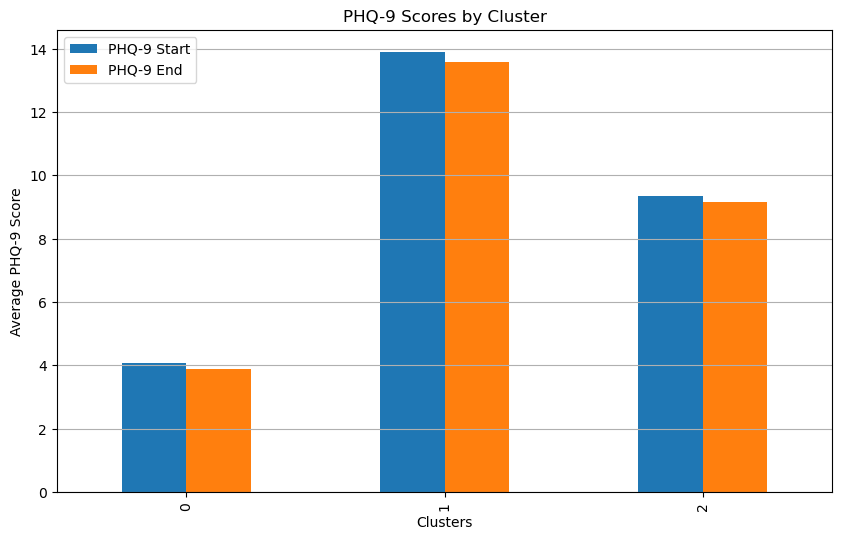

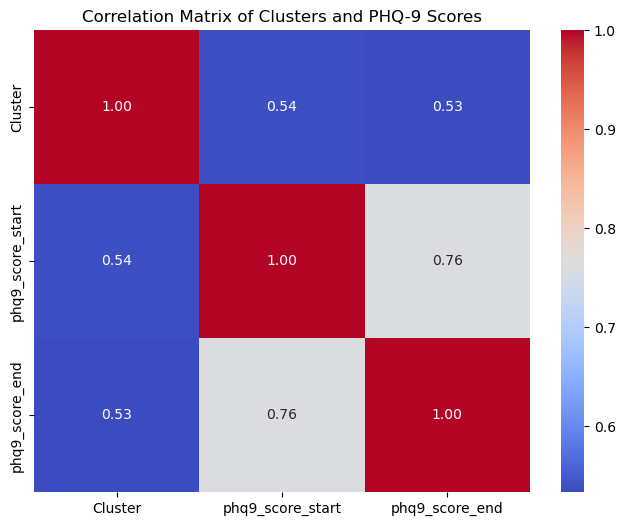

In [65]:
phq9_and_clusters = pd.DataFrame({
    'Cluster': clustering_data['Cluster'],
    'PHQ-9 Start': clustering_data['phq9_score_start'],
    'PHQ-9 End': clustering_data['phq9_score_end']
})

phq9_means = phq9_and_clusters.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
phq9_means.plot(kind='bar', figsize=(10, 6))
plt.title('PHQ-9 Scores by Cluster')
plt.ylabel('Average PHQ-9 Score')
plt.xlabel('Clusters')
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.show()


correlation_data = clustering_data[['Cluster', 'phq9_score_start', 'phq9_score_end']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Clusters and PHQ-9 Scores')
plt.show()


### Figure Analysis: PHQ-9 Scores and Clustering Insights

**Figure 13** provides a comparative analysis of PHQ-9 scores (depression severity) at the start and end of the study across the three clusters:

- **Cluster 0**: Participants had the lowest PHQ-9 scores, indicating minimal depression severity and better mental health outcomes. Their scores decreased slightly from **4.07** at the start to **3.87** at the end of the study.
- **Cluster 1**: Participants exhibited the highest PHQ-9 scores, reflecting severe depression severity. Their scores declined slightly from **13.90** at the start to **13.56** at the end.
- **Cluster 2**: Participants had moderate PHQ-9 scores, with values of **9.35** at the start and **9.15** at the end, consistent with their classification as a moderately affected group.

**Figure 14** illustrates the correlation between clusters and PHQ-9 start and end scores using a heatmap:

- **Cluster 0**: Shows a weak positive correlation with PHQ-9 scores, aligning with their low depression severity and better mental health outcomes.
- **Cluster 1**: Demonstrates a strong positive correlation with PHQ-9 scores, confirming that participants in this group experience severe depression and may require significant mental health interventions.
- **Cluster 2**: Displays a moderate correlation with PHQ-9 scores, aligning with their classification as participants with moderate depression severity.

### Key Observations:
1. **Cluster 0**: Represents individuals with better mental health outcomes, likely due to higher activity levels and better sleep efficiency.
2. **Cluster 1**: Highlights participants experiencing severe depression, requiring targeted and intensive mental health support.
3. **Cluster 2**: Underscores the need for interventions focused on stress management and sleep quality improvement.

This analysis of PHQ-9 scores validates the clustering approach, which successfully differentiates mental health profiles for each group. The findings emphasize the importance of tailored interventions:
- **Cluster 0**: Encouraging the maintenance of positive behaviors.
- **Cluster 1**: Providing intensive mental health support.
- **Cluster 2**: Addressing stress and improving sleep quality.


###  RESULTS OF THE PROJECT
The results of the analysis reveal meaningful insights into the relationship between wearable metrics and depression severity, as measured by PHQ-9 scores. The clustering approach successfully segmented participants into three distinct groups based on shared behavioral characteristics, including physical activity, sleep efficiency, and mental health indicators.

- **Cluster 0**: Participants displayed high levels of physical activity, optimal sleep efficiency, and the lowest depression severity, reflecting a positive mental health profile.
- **Cluster 1**: Participants exhibited moderate activity levels and sleep efficiency but the highest depression severity, highlighting a need for targeted mental health interventions.
- **Cluster 2**: Participants were characterized by poor sleep efficiency and moderate depression severity, demonstrating the importance of improving sleep quality and managing stress for better mental health outcomes.

Correlation analyses showed weak to moderate relationships between physical activity, sleep patterns, and depression severity. While moderate-to-vigorous physical activity (MVPA) had minimal direct correlation with PHQ-9 scores, integrating multiple factors like sleep and activity levels provided deeper insights. Notably, **sleep efficiency** emerged as a significant metric, inversely associated with depression severity.

Demographic analyses further enriched the clustering results, revealing differences in  stress levels, and efforts to reduce alcohol use across clusters. For example:
- **Cluster 1**: Participants with severe depression had the reported the most efforts to reduce alcohol consumption.
- **Cluster 2**: Participants showed the highest life stress levels, further emphasizing the need for stress management strategies.

These results demonstrate that combining wearable data with clustering techniques can provide actionable insights into mental health management, enabling the identification of at-risk groups and the development of targeted interventions.



###  REFERENCES:
1. Makhmutova, M., Kainkaryam, R., Ferreira, M., Min, J., Jaggi, M. and Clay, I., 2024. PSYCHE-D: predicting change in depression severity using person-generated health data (DATASET). [Dataset] Available at: [https://zenodo.org/records/5085146](https://zenodo.org/records/5085146) [Accessed 6 Dec. 2024].
2. World Health Organization (WHO), 2024. Depression. [Online] Available at: [https://www.who.int/news-room/fact-sheets/detail/depression](https://www.who.int/news-room/fact-sheets/detail/depression) [Accessed 6 Dec. 2024].
3. Sivertsen, H., Bjørkløf, G., & Engedal, K., 2021. Depression in older adults: Prevalence and determinants. *Annals of General Psychiatry*. Available at: [https://annals-general-psychiatry.biomedcentral.com/articles/10.1186/s12991-021-00375-x](https://annals-general-psychiatry.biomedcentral.com/articles/10.1186/s12991-021-00375-x) [Accessed 6 Dec. 2024].
4. Wang, Z., Huang, Q., & Lin, D., 2021. Evolution and emerging trends in depression research from 2004 to 2019. *Frontiers in Psychiatry*, [online] 12, p.705749. Available at: [https://www.frontiersin.org/journals/psychiatry/articles/10.3389/fpsyt.2021.705749/full](https://www.frontiersin.org/journals/psychiatry/articles/10.3389/fpsyt.2021.705749/full) [Accessed 6 Dec. 2024].

